# INM430 - Tiny DS Project 


***

** Student Name: ** _Vithurshan Vijayachandran_

** Project Title:** _Features of a Successful Kickstarter Project._

***




## Libraries 

In [1]:
%matplotlib inline

import csv as csv 
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import xgboost as xgb

from plotnine import *
from datetime import datetime
from datetime import date
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from os import path
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix


## Loading Data

Web robots data set consisted of 55 CSV files so below code was used to combine it all in to one CSV file.

In [2]:
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])#combine all files in the list
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')#export to csv **
#[6]#

In [3]:
#Import the combined csv file
ksdf = pd.read_csv('Kickstarter.csv')
ksdf.reset_index(inplace=True)

In [4]:
pd.set_option('display.max_columns', 999)
ksdf.head(3)

,index,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,0,1,An eco-friendly coffee table that is both func...,"{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",240,US,1473631551,"{""id"":983022919,""name"":""Rhys Kucharski"",""is_re...",USD,$,True,USD,1480966943,False,NaN,1.000000,5000.0,1504859185,NaN,False,NaN,1478371343,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",Industrial Bamboo Table,NaN,"{""key"":""assets/013/695/911/e0a26959b2f3a1dfc64...",240.0,"{""id"":2674851,""project_id"":2674851,""state"":""in...",industrial-bamboo-table,https://www.kickstarter.com/discover/categorie...,False,False,failed,1480966943,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",240.000000,international
1,1,3,We take digital uploads and make them handpain...,"{""id"":23,""name"":""Painting"",""slug"":""art/paintin...",243,CA,1436540372,"{""id"":101531536,""name"":""Picadoo Custom Art"",""i...",CAD,$,True,USD,1440417634,False,NaN,0.753746,1000.0,49266114,NaN,False,NaN,1437480034,"{""id"":4063,""name"":""London"",""slug"":""london-ca"",...","Custom Pet Portraits on Canvas- ""From Pixels t...",NaN,"{""key"":""assets/012/193/266/007123f2ab3331c4d1b...",322.0,"{""id"":2007748,""project_id"":2007748,""state"":""in...",custom-pet-portraits-on-canvas-from-pixels-to-...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1440417634,0.770032,"{""web"":{""project"":""https://www.kickstarter.com...",247.950175,domestic
2,2,243,We are a team of restaurant pros looking to fu...,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",41738,US,1427218874,"{""id"":372111659,""name"":""Kevin, Domingo & Suzie...",USD,$,True,USD,1431706954,False,NaN,1.000000,35000.0,1228074690,NaN,False,NaN,1429114954,"{""id"":2367105,""name"":""Boston"",""slug"":""boston-m...",The Barmobile: Boston's Mobile Cocktail Cateri...,NaN,"{""key"":""assets/012/081/761/cc38b3bba0cdd4ac01e...",41738.0,"{""id"":1793461,""project_id"":1793461,""state"":""in...",the-barmobile-bostons-mobile-cocktail-catering...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1431706954,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",41738.000000,international


In [5]:
print('The kickstarter data set has {} rows and {} columns.'.format(ksdf.shape[0],ksdf.shape[1]) )
ksdf.describe(include='all')


The kickstarter data set has 207848 rows and 38 columns.


,index,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
count,207848.000000,207848.000000,207839,207848,2.078480e+05,207848,2.078480e+05,207848,207848,207848,207848,207848,2.078480e+05,207848,156,207848.000000,2.078480e+05,2.078480e+05,156,207848,156,2.078480e+05,207622,207848,156,207848,2.078480e+05,207848,207848,207848,207848,207848,207848,2.078480e+05,207848.000000,207848,2.078480e+05,206540
unique,NaN,NaN,179374,169,NaN,22,NaN,207200,14,6,2,5,NaN,2,1,NaN,NaN,NaN,2,2,1,NaN,15270,180355,1,180935,NaN,180936,180934,169,2,2,5,NaN,NaN,181070,NaN,2
top,NaN,NaN,Help support the largest creative collaboratio...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",NaN,US,NaN,"{""id"":978911160,""name"":""For Freedoms"",""is_regi...",USD,$,True,USD,NaN,False,[],NaN,NaN,NaN,False,False,False,NaN,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Home,[],"{""key"":""assets/012/317/630/b98babf89ba2b059af2...",NaN,"{""id"":2248185,""project_id"":2248185,""state"":""ac...",lidrivio-worlds-best-olive-oil,https://www.kickstarter.com/discover/categorie...,True,False,successful,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",NaN,domestic
freq,NaN,NaN,52,4371,NaN,147992,NaN,12,147992,167483,170286,206540,NaN,207225,156,NaN,NaN,NaN,154,203183,156,NaN,9646,7,156,3,NaN,3,3,2400,118175,181089,118175,NaN,NaN,3,NaN,168412
mean,103923.500000,148.180016,NaN,NaN,1.330363e+04,NaN,1.453200e+09,NaN,NaN,NaN,NaN,NaN,1.460120e+09,NaN,NaN,0.993843,4.971114e+04,1.073122e+09,NaN,NaN,NaN,1.457296e+09,NaN,NaN,NaN,NaN,1.909559e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.459956e+09,1.011900,NaN,1.318990e+04,NaN
std,60000.693713,890.405307,NaN,NaN,9.018058e+04,NaN,6.192901e+07,NaN,NaN,NaN,NaN,NaN,6.157192e+07,NaN,NaN,0.205432,1.187729e+06,6.195257e+08,NaN,NaN,NaN,6.161166e+07,NaN,NaN,NaN,NaN,3.306954e+05,NaN,NaN,NaN,NaN,NaN,NaN,6.146450e+07,0.231238,NaN,8.931127e+04,NaN
min,0.000000,0.000000,NaN,NaN,0.000000e+00,NaN,1.240366e+09,NaN,NaN,NaN,NaN,NaN,1.241334e+09,NaN,NaN,0.007127,1.000000e-02,8.624000e+03,NaN,NaN,NaN,1.240603e+09,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.241334e+09,0.008771,NaN,0.000000e+00,NaN
25%,51961.750000,4.000000,NaN,NaN,1.050000e+02,NaN,1.412086e+09,NaN,NaN,NaN,NaN,NaN,1.419048e+09,NaN,NaN,1.000000,1.500000e+03,5.349892e+08,NaN,NaN,NaN,1.416272e+09,NaN,NaN,NaN,NaN,1.060000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.418940e+09,1.000000,NaN,1.050000e+02,NaN
50%,103923.500000,27.000000,NaN,NaN,1.546000e+03,NaN,1.455758e+09,NaN,NaN,NaN,NaN,NaN,1.462488e+09,NaN,NaN,1.000000,5.000000e+03,1.075613e+09,NaN,NaN,NaN,1.459693e+09,NaN,NaN,NaN,NaN,1.560000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.462399e+09,1.000000,NaN,1.547000e+03,NaN
75%,155885.250000,89.000000,NaN,NaN,6.650000e+03,NaN,1.507387e+09,NaN,NaN,NaN,NaN,NaN,1.514011e+09,NaN,NaN,1.000000,1.500000e+04,1.608395e+09,NaN,NaN,NaN,1.511215e+09,NaN,NaN,NaN,NaN,7.003000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.513974e+09,1.000000,NaN,6.646000e+03,NaN


## Data Process

### Initial cleaning of the data

In [6]:
#Data type of each column 
ksdf.dtypes

index                         int64
backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                     

#### Duplicate rows

In [7]:
#Check for duplicate rows
duplicateRows = ksdf[ksdf.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [index, backers_count, blurb, category, converted_pledged_amount, country, created_at, creator, currency, currency_symbol, currency_trailing_code, current_currency, deadline, disable_communication, friends, fx_rate, goal, id, is_backing, is_starrable, is_starred, launched_at, location, name, permissions, photo, pledged, profile, slug, source_url, spotlight, staff_pick, state, state_changed_at, static_usd_rate, urls, usd_pledged, usd_type]
Index: []


No duplicate rows found.

#### Missing Values

In [8]:
#Chech for missing values
print (ksdf.shape[0] - ksdf.count())

index                            0
backers_count                    0
blurb                            9
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     207692
fx_rate                          0
goal                             0
id                               0
is_backing                  207692
is_starrable                     0
is_starred                  207692
launched_at                      0
location                       226
name                             0
permissions                 207692
photo                            0
pledged                          0
profile                          0
slug                

The following columns can be dropped as all rows are empty.

In [9]:
# Drop useless columns 
dropCol = ['friends','is_backing', 'is_starred', 'permissions']
ksdf.drop(labels=dropCol, axis='columns', inplace=True)

The following columns can be dropped as it will not be required for the objective of the analysis: 

In [10]:
# Drop useless columns 
dropCol = ['index','id', 'urls', 'photo', 'profile', 'source_url', 'spotlight', 'creator','disable_communication','is_starrable', 'location']
ksdf.drop(labels=dropCol, axis='columns', inplace=True)

As the pledged amount has been converted to one currency(USD) and available in 'usd_pledged', the following columns can be dropped: 

In [11]:
# Drop useless columns 
dropCol = ['usd_type', 'converted_pledged_amount', 'fx_rate', 'currency_trailing_code', 'currency_symbol',  'current_currency']
ksdf.drop(labels=dropCol, axis='columns', inplace=True)

Some initial data analysis is required before deciding wether the empty rows in cloumn blurb need to be dropped.

#### Time format

Time format is coverted into standard readable format.

In [12]:
#Change time format into standard from UNIX
columnDate = ['state_changed_at', 'created_at', 'launched_at', 'deadline']

for i in columnDate:
    ksdf[i] = ksdf[i].apply(lambda x:datetime.fromtimestamp(int(x)).strftime(('%Y-%m-%d %H:%M:%S')))

    #print(datetime.datetime.fromtimestamp(int('1284105682')).strftime('%Y-%m-%d %H:%M:%S'))

#### Convert currency

Projects goal will be converted from native currency to USD the unwanted columns will be dropped.

In [13]:
#convert currency
ksdf['goal_usd'] = round(ksdf.goal * ksdf.static_usd_rate,2)

In [14]:
# Drop useless columns 
dropCol = ['goal','static_usd_rate', 'pledged', 'currency']
ksdf.drop(labels=dropCol, axis='columns', inplace=True)

#### Layout of data frame

In [15]:
#Rename columns with more meaningful names
ksdf.rename(columns={'blurb': 'description', 'slug':'keywords'}, inplace=True)

In [16]:
#Rearrange columns 
ksdf = ksdf[['name', 'description', 'category', 'country', 'created_at', 'launched_at', 'deadline', 'state_changed_at', 'goal_usd', 'usd_pledged', 'state', 'backers_count', 'staff_pick', 'keywords'  ]]

#### Project States

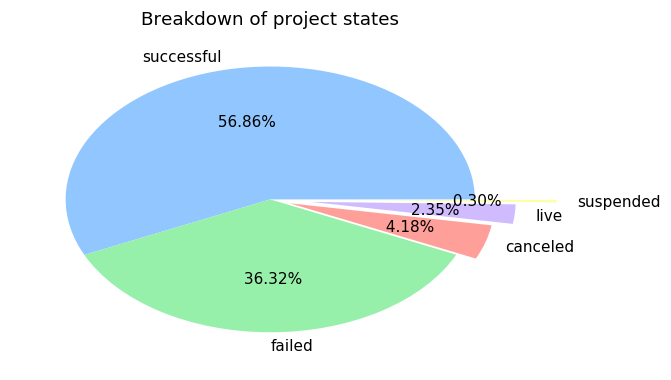

In [17]:
#Display the states
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1,1, dpi=110)
explode = [0,0,.1,.2, .4]
ksdf.state.value_counts().head(5).plot.pie(autopct =' %0.2f%%', explode = explode)

plt.title('Breakdown of project states')
plt.ylabel('')
plt.show()

Scope of the project is to understand factors contributing towards the success of a project, the data of projects which are suspended or live or cancelled will be dropped as it is not relevant for the purpose of our analysis.

In [18]:
#Get indexes for cancelled, live and suspended rows
canceled = ksdf[ksdf['state'] == 'canceled'].index
live = ksdf[ksdf['state'] == 'live'].index
suspended = ksdf[ksdf['state'] == 'suspended'].index

#Drop the rwos from database
ksdf.drop(canceled, inplace = True)
ksdf.drop(live, inplace = True)
ksdf.drop(suspended, inplace = True)

## Explorative Analysis 

In [19]:
#Sample data frame to work with 
df = ksdf.sample(n = 1000) 

Log-transformation was used continously through out to make the trend clearer, as the distribution is heavily positively skewed(see below). Data Scaling, Normlaization and Outlier detection will be performed in the later stages.

Text(0.5,1,'Log Normalisation')

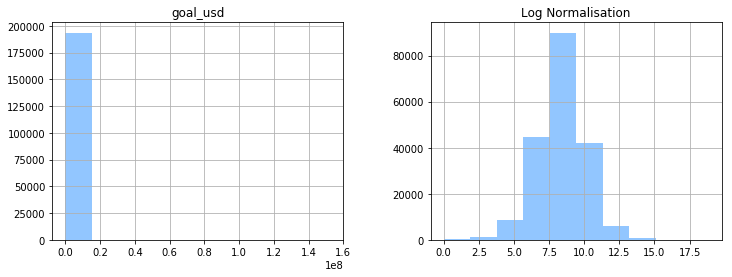

In [20]:
#Get numeric columns and plot is histogram 
ksdfCol = ksdf[['goal_usd', 'usd_pledged', 'backers_count']]
normalisedCol = ksdfCol.apply(np.log1p)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax1 = ksdf.hist('goal_usd',  ax=axes[0])
ax2 = normalisedCol.hist('goal_usd',  ax=axes[1])
plt.title('Log Normalisation')

Log +1 Function  was used as most values were 0's.

In [21]:
#usd pledged
ksdf['usd_pledged_log'] = np.log(ksdf['usd_pledged'] + 1)

In [22]:
#goal pledged
ksdf['goal_usd_log'] = np.log(ksdf['goal_usd'] + 1)

In [23]:
#backers count pledged
ksdf['backers_count_log'] = np.log(ksdf['backers_count'] + 1)

### Projects Success Rate

Text(0.5,1,'Projects Success to Failure Ratio')

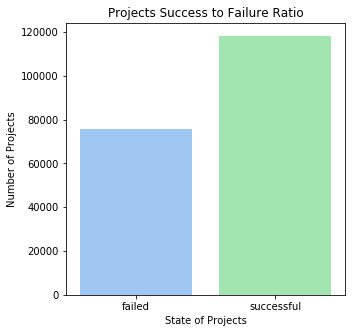

In [24]:
#comparing state of projects
plt.figure(figsize = (5,5))
ax = sns.countplot(x="state", data=ksdf)
plt.xlabel('State of Projects')
plt.ylabel('Number of Projects')
plt.title('Projects Success to Failure Ratio')

Our intial observation of the data show 60% of the projects succeed.

### Name

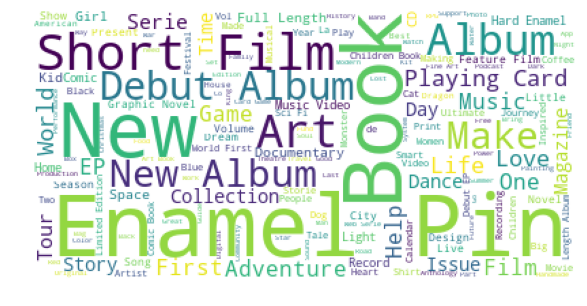

In [25]:
successfulName = ksdf[(ksdf.state == 'successful') & (ksdf.name)]

#get all the name
text = " ".join(name for name in successfulName.name)
#create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['project', 'kickstarter'])
#create word cloud and display
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)

plt.figure(figsize = (20,5))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis('off')
plt.show()

Word cloud of project names was created to view what are the commonly used words to name successful projects.<br> Our early observation shows that projects empathize on new inventions could lead to success as the word 'New' is very popular.<br> 

### Location

In [26]:
print(f"There are projects from {ksdf.country.nunique()} countries.")

There are projects from 22 countries.


Text(0.5,1,'Projects quantity by Country')

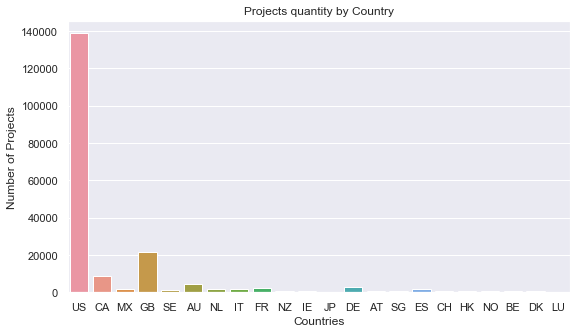

In [27]:
#compare project by location
plt.figure(figsize = (9,5))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'country', data = ksdf, )
plt.xlabel('Countries')
plt.ylabel('Number of Projects')
plt.title('Projects quantity by Country')

Here we can see huge imblance in the dataset as most of the projects are from US. This doesn't come as a surprise as it is a US based website and didn't open up to project based in other countries until 3 years after the launch.[5]

Text(0.5,1,'Projects quantity by Country')

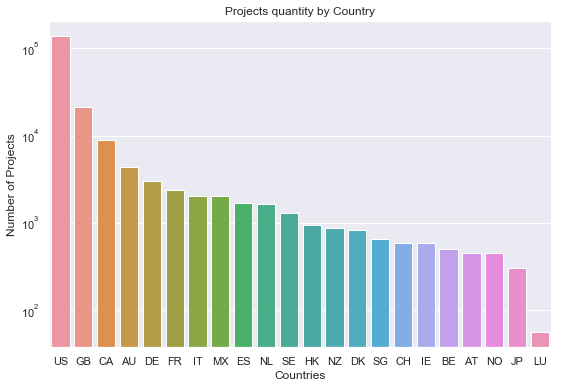

In [28]:
#add logarithmic scale for better view of graph 
plt.figure(figsize = (9,6))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'country', data = ksdf, order=ksdf.country.value_counts().iloc[:22].index)
ax.set_yscale('log')
plt.xlabel('Countries')
plt.ylabel('Number of Projects')
plt.title('Projects quantity by Country')

Initial location analysis shows that top 4 countries(US, Great Britain, Canada and Australia) with most kickstarter projects are all native English speaking countries. Language playing a major could be down to it being an English based website.`

Text(0.5,1,'Projects success rate by Country')

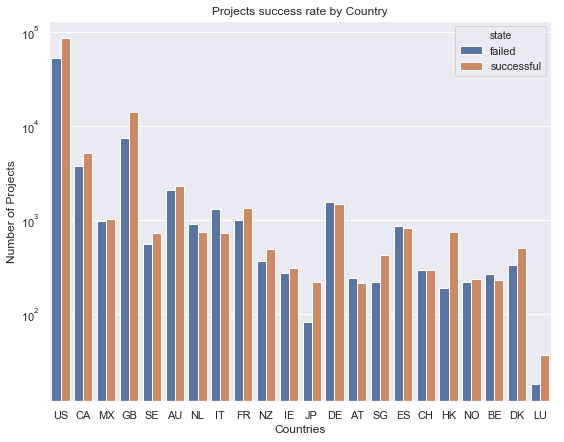

In [29]:
#comparing state of projects per location
plt.figure(figsize = (9,7))
ax = sns.countplot(x="country", hue="state", data=ksdf)
ax.set_yscale('log')
plt.xlabel('Countries')
plt.ylabel('Number of Projects')
plt.title('Projects success rate by Country')

Here we can see that projects from Japan and HongKong have the best success rate where as projects from Belgium and Austria are more likely to fail even though the ratio is very marginal.<br>

location wise anyalsis will prove to be unfair considering the imbalanced data. For this reson we will not be taking location as feature to jusdge a project's success. 

### Category

In [30]:
ksdf['category'][0]

'{"id":356,"name":"Woodworking","slug":"crafts/woodworking","position":14,"parent_id":26,"color":16744876,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/crafts/woodworking"}}}'

Project category and sub category information was is in a nested dictionary so it had to be extracted before it was to be used.

In [31]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
ksdf['sub_category'] = ksdf.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
ksdf['category'] = ksdf.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
ksdf['category'] = ksdf.apply(f, axis=1)
#[4]#

In [32]:
print(f"There are {ksdf.category.nunique()} unique categories and {ksdf.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 145 unique sub-categories.


Text(0.5,1,'Projects quantity by Category')

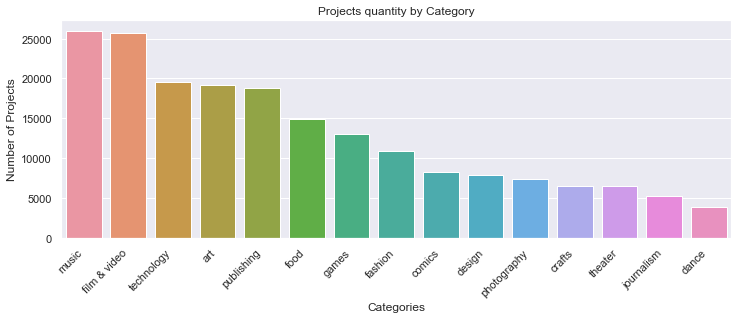

In [33]:
#View by category
plt.figure(figsize = (12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'category', data = ksdf, order=ksdf.category.value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Categories')
plt.ylabel('Number of Projects')
plt.title('Projects quantity by Category')

Here we can see that "music" and "film & video" are the top 2 popular categories. Since we are looking to identy fetures of successful projects, we do not need to dive deep into popularity.

Text(0.5,1,'Projects quantity by Category')

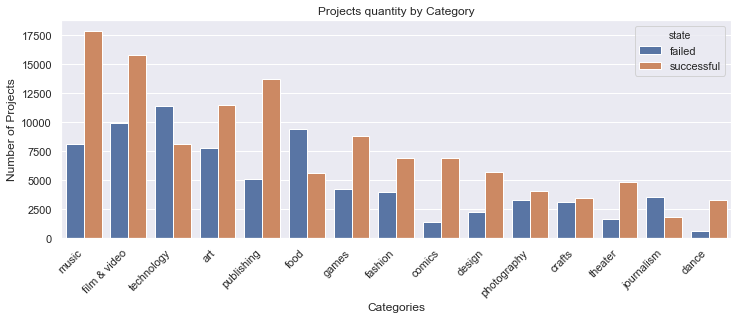

In [34]:
#View by state of category 
plt.figure(figsize = (12,4))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'category', hue ='state', data = ksdf, order=ksdf.category.value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Categories')
plt.ylabel('Number of Projects')
plt.title('Projects quantity by Category')

Here we can see that projects under the category "comics", "dance" and "publishing" have the better success rate. "dance" in particual has a very low failure rate even though it is the least popular.<br> 
Of the top 2 popular categories, "music" has the better success rate. <br>
Our early assumption is that "music", "comics", "publishing" and "dance" categories are features of a successful project.

View the multiple count plot below for a better scale of above graph.

### prints categories as multiple count plots
unique = ksdf.category.unique()
n = 1
fig = plt.figure(figsize = (30,30))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in unique:
        category = ksdf[(ksdf.category == i)]
        ax = fig.add_subplot(3, 5, n)
        ax = sns.countplot(x='category', hue="state", data=category)
        n = n + 1

^^

#### Sub Category 

Text(0.5,1,'Dance Projects Success by Sub Category')

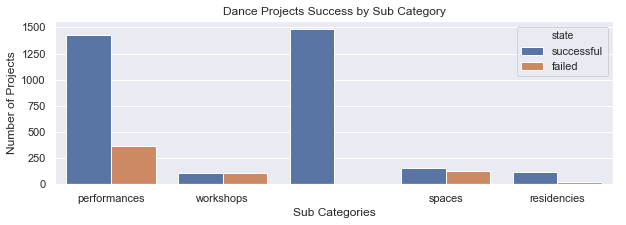

In [35]:
#Sub categories of comics
dff = ksdf.loc[ksdf['category'] == 'dance']
plt.figure(figsize = (10,3))
plt.title('Sub categories of Dance')
ax = sns.countplot(x="sub_category", hue="state", data=dff)
plt.xlabel('Sub Categories')
plt.ylabel('Number of Projects')
plt.title('Dance Projects Success by Sub Category')

Here we can see that dance projects that do not have a sub category have a 100% success rate. Performance is the most popular category with a great success rate also while others are not very popular or succesful. 
In order for us to assume projects that are not sub categorised is a feature of a succesful project we need to analyse all other categories.

Text(0.5,1,'Projects success rate without Sub Category')

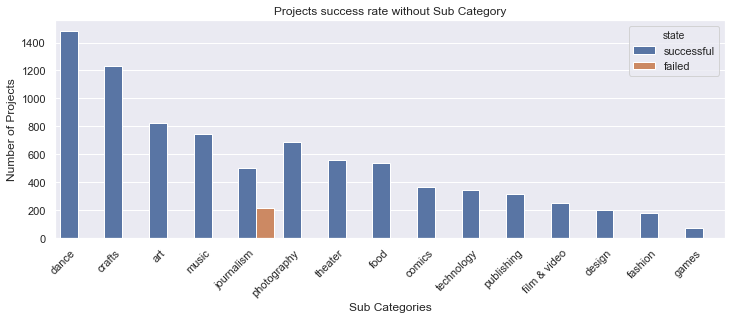

In [36]:
#Categories without sub categories
subCat = ksdf.loc[ksdf['sub_category'] == ""]
plt.figure(figsize = (12,4))
ax = sns.countplot(x="category", hue="state", data=subCat,order=subCat.category.value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Sub Categories')
plt.ylabel('Number of Projects')
plt.title('Projects success rate without Sub Category')

Here we can see that all the projects without sub categories have have 100% success rate except "journalism". This is a very surprising finding yet it clearly shows it is a key feature of a successful project. 

### Staff picked Projects

Text(0.5,1,'Projects success rate by Staff Pick')

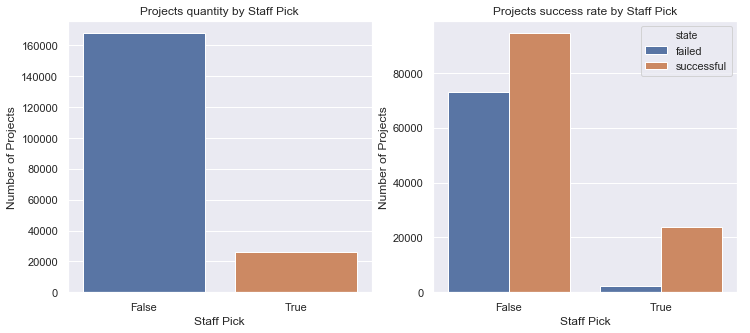

In [37]:
#comparing staff picked projects
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="staff_pick", data=ksdf)
plt.xlabel('Staff Pick')
plt.ylabel('Number of Projects')
plt.title('Projects quantity by Staff Pick')

plt.subplot(1,2,2)
ay = sns.countplot(x="staff_pick", hue="state", data=ksdf)
plt.xlabel('Staff Pick')
plt.ylabel('Number of Projects')
plt.title('Projects success rate by Staff Pick')

Here we can see that minimal amount of projects are picked by staff, but of those that are picked, very minimal amount failed. Even though projects not picked by staff have found great success, ensuring the project staff picked contributes significantly towards its success. 

### Project Goal 

In [38]:
#Split successful and unsuccessful projects
successfulProject = ksdf.loc[ksdf['state']== 'successful']
unsuccessfulProject = ksdf.loc[ksdf['state']== 'failed']

Text(0.5,1,'Popular Goal Amount')

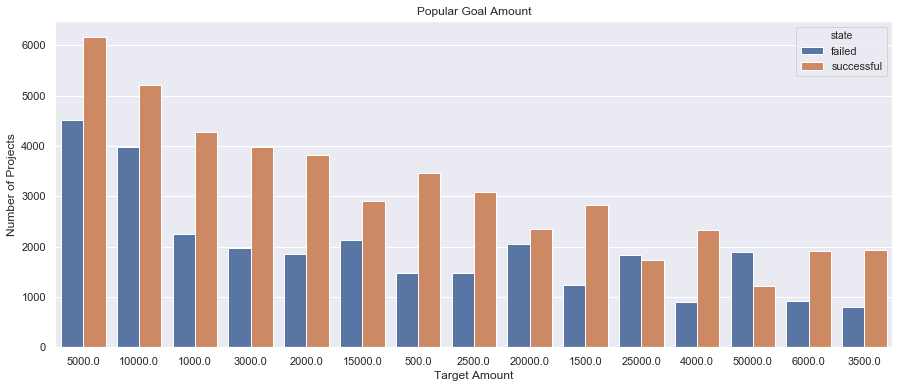

In [39]:
#View goal maount by state
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'goal_usd',hue='state', data = ksdf, order=ksdf.goal_usd.value_counts().iloc[:15].index)
plt.xlabel('Target Amount')
plt.ylabel('Number of Projects')
plt.title('Popular Goal Amount')

Here we can see that top 15 goal amount of all the projects range from 500 to 50,000. From here can make an early assumption that project goal should be kept below 20,000 to increase the chance of success. This is because figures with lower success rate are higher in range (25,000 and 50,000).

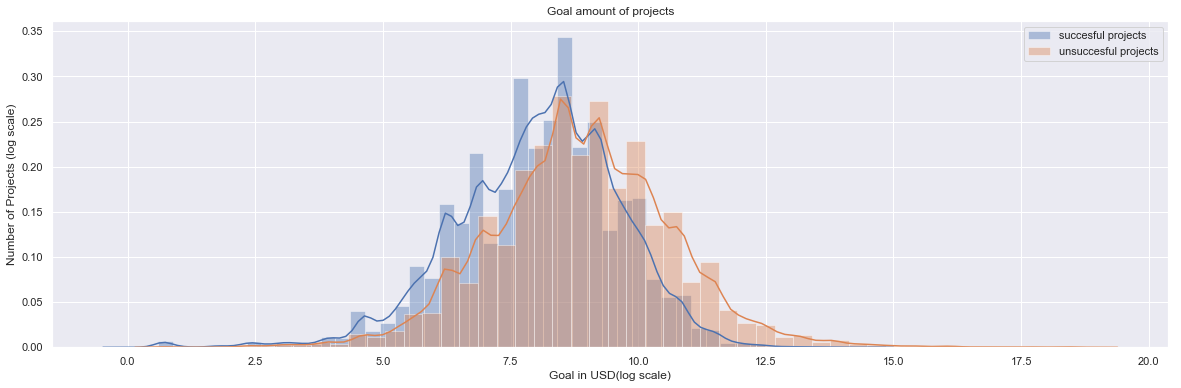

In [40]:
#Display the goal amount of succesful projects against unsuccessful projects
plt.figure(figsize = (20,6))
ax = sns.distplot(successfulProject.goal_usd_log)
ay = sns.distplot(unsuccessfulProject.goal_usd_log)
plt.legend(labels=['succesful projects','unsuccesful projects'])
plt.xlabel('Goal in USD(log scale)')
plt.ylabel('Number of Projects (log scale)')
plt.title('Goal amount of projects')
plt.show()

In [41]:
#print median
print(f"Median goal of successful projects is {int(round(ksdf.loc[ksdf['state'] == 'successful'].goal_usd.median(),0))}.")
print(f"Median goal of unsuccessful projects is {int(round(ksdf.loc[ksdf['state'] == 'failed'].goal_usd.median(),0))}.")

Median goal of successful projects is 3500.
Median goal of unsuccessful projects is 7078.


Here we can see further proof that succesful projects on average have lower amount of goal(less ambitious). Median goal of succesful project is half of that of unsuccessful projects. 

### Amount Pledged

Text(0.5,1,'Pledged amount for project')

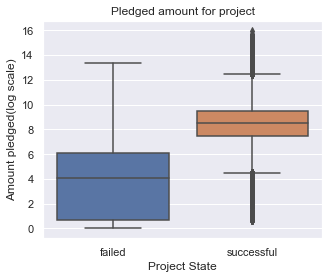

In [42]:
#Compare amount pledged by backers
launchdays = ksdf['usd_pledged_log']
plt.figure(figsize = (5,4))
sns.boxplot(x ='state', y = launchdays, data = ksdf)
plt.xlabel('Project State')
plt.ylabel('Amount pledged(log scale)')
plt.title('Pledged amount for project')

It is no surprise to see that more amount has been pledged on succesful projects. Unsuccesful projects however have had amount pledged by backers but didn't meet the goal. Could this be due to the goal being too high or failing to attract enough backers?

### Backers

Text(0.5,1,'Number of backers of projects')

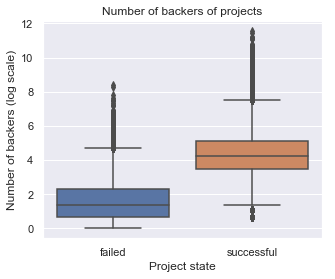

In [43]:
#Compare number of backers
goalSet = ksdf['backers_count_log']
plt.figure(figsize = (5,4))
sns.boxplot(x ='state', y = goalSet, data = ksdf)
plt.xlabel('Project state')
plt.ylabel('Number of backers (log scale)')
plt.title('Number of backers of projects')

In [44]:
print(f"Mean number of backers per successful projects is {int(round(ksdf.loc[ksdf['state'] == 'successful'].backers_count.mean(),0))}.")
print(f"Mean number of backers per unsuccessful projects is {int(round(ksdf.loc[ksdf['state'] == 'failed'].backers_count.mean(),0))}.")

Mean number of backers per successful projects is 249.
Mean number of backers per unsuccessful projects is 12.


Here we can see that attracting a high number of backers is a feature of a succesful project. With the a huge difference between mean number of backers of successful and unsuccessful projects.  <br>
However, many of the unsuccessful projects were backed by more than 249(mean)backers, they faied to succed. Could this be due to the goal being too high? <br>

## Variable imporant 

In [45]:
sampleDataLog = ksdf[['goal_usd_log','usd_pledged_log','backers_count_log', 'state']]

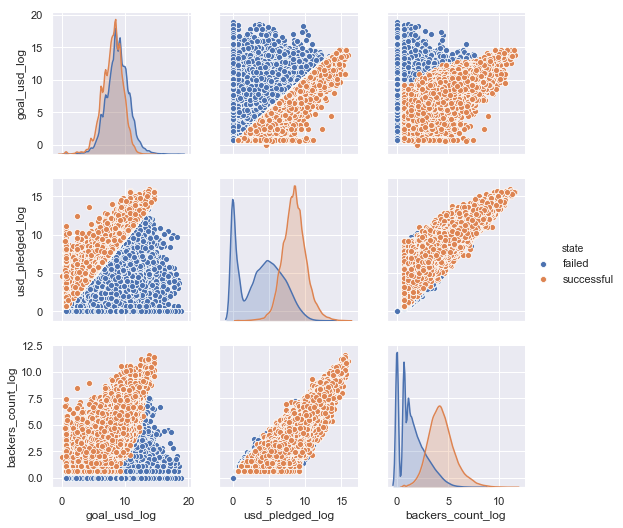

In [46]:
sns.pairplot(sampleDataLog, hue='state', height=2.5)

Here we can see that usd pledged and backers count are postivie correlated. Our earlier observation also shows that as successful projects have more amount pledged and have more backers per projects. We can also see that successful projects have lower goal compared to failed projects as observed earlier.

Heatmap below also confirms that the strength of the values 'usd_pledged' and 'backers_count' is very high positive. 

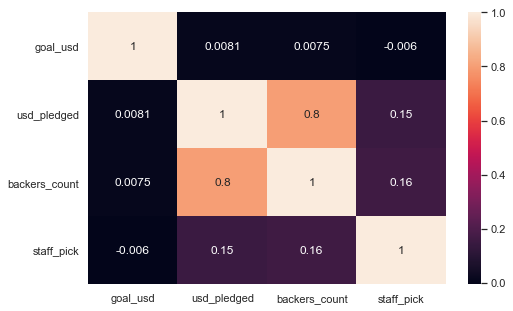

In [47]:
sampleData = ksdf[['goal_usd','usd_pledged','backers_count', 'staff_pick']]
plt.figure(figsize=(8,5))
sns.heatmap(sampleData.corr(), annot = True)
plt.show()

## Feature Engineering

### Name, Description and Keywords

Name, Description and keywords columns consists of written explanation of the project. Eventhough Natural Language Processing could add an intresting dimension to the project, considering the scope of the project it may prove to be very challenging. However, the variables cannot be simple ignored as it plays a major role in attracting backers into pledging. In this case, the length of variables, presence of punctuation will be calculated. This is will be used to analyse wether if the features contributes to project success.

#### name

In [48]:
#Split name length and count the words
ksdf['name_length'] = ksdf['name'].str.split().str.len()
#Check for question mark
ksdf['name_contains_question_mark'] = ksdf['name'].str.strip().str.contains('\?')
#Check for exclamation mark
ksdf['name_contains_exclamation_mark'] = ksdf['name'].str.strip().str.contains('!')
#check for dash
ksdf['name_contains_dash'] = ksdf['name'].str.strip().str.contains('-')
#check for colon
ksdf['name_contains_colon'] = ksdf['name'].str.strip().str.contains(':')

#### description

In [49]:
#Split description length and count the words
ksdf['description_length'] = ksdf['description'].str.split().str.len()
#Check for question mark
ksdf['description_contains_question_mark'] = ksdf['description'].str.strip().str.contains('\?')
#Check for exclamation mark
ksdf['description_contains_exclamation_mark'] = ksdf['description'].str.strip().str.contains('!')
#check for dash
ksdf['description_contains_dash'] = ksdf['description'].str.strip().str.contains('-')
#check for colon
ksdf['description_contains_colon'] = ksdf['description'].str.strip().str.contains(':')

#### keywords

In [50]:
#Split keyword length and count the words
ksdf['keyword_length'] = ksdf['keywords'].str.split('-', expand=False).str.len()

#### missing values

Description had 2 missing values. Intial idea was to fill the null values with 0 but after inspecting the values it was clear that all other projects had at least one word in their description so it was decided that filling the null values with median of the columns will be more fitting. However, missing punctuation marks values will be filled with false.

In [51]:
#fill the missing values with median
ksdf['description_length']=ksdf['description_length'].fillna(ksdf['description_length'].median())

In [52]:
#fill the missing punctuation with false
ksdf['description_contains_question_mark'].fillna(False,inplace=True)
ksdf['description_contains_exclamation_mark'].fillna(False,inplace=True)
ksdf['description_contains_dash'].fillna(False,inplace=True)
ksdf['description_contains_colon'].fillna(False,inplace=True)

In [53]:
#convert type to int
ksdf['description_length'] = ksdf['description_length'].astype(int)

In [54]:
#Drop columns 
dropCol = ['description','keywords', 'name']
ksdf.drop(labels=dropCol, axis='columns', inplace=True)

### Sub category

In [55]:
#find non sub catgorised projects
lengthSubCategory = ksdf['sub_category'].str.split().str.len()
ksdf['sub_categorised'] = lengthSubCategory < 1

### Project Duration 

Deadline duration of each project and time taken to launch project will be used analyse how much it contributes towards the project success.

In [56]:
#Strip time 
columnDate=['state_changed_at','created_at','launched_at','deadline']

for i in columnDate:
    ksdf[i]=ksdf[i].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
#[9]#

In [57]:
#Getting the deadline set for each project in days
days=[]
for i in range(len(ksdf['deadline'])):
        days.append((ksdf['deadline'].iloc[i]-ksdf['launched_at'].iloc[i]).days)
             
ksdf['deadline_duration']= days

In [58]:
#Getting the days taken to launch for each project in days
dayss=[]
for i in range(len(ksdf['launched_at'])):
        dayss.append((ksdf['launched_at'].iloc[i]-ksdf['created_at'].iloc[i]).days)
             
ksdf['launch_duration']= dayss

### Launched Month and Day

Day and month project was lauched in.

In [59]:
#get month from date
ksdf['month_launched'] = ksdf.launched_at.dt.month

In [60]:
#get day from date
ksdf['day_launched'] = ksdf.launched_at.dt.dayofweek

In [61]:
#Split backers of successful and unsuccessful projects
successfulProject = ksdf.loc[ksdf['state']== 'successful']
unsuccessfulProject = ksdf.loc[ksdf['state']== 'failed']

## What are the features of a successful project name?

In [62]:
#Successful projects
successfulProject = ksdf.loc[ksdf['state']== 'successful']

In [63]:
#Group by category
groupByCategory = successfulProject.groupby(['category']).sum()

### Length

Text(0.5,1,'Projects success by Keyword Length')

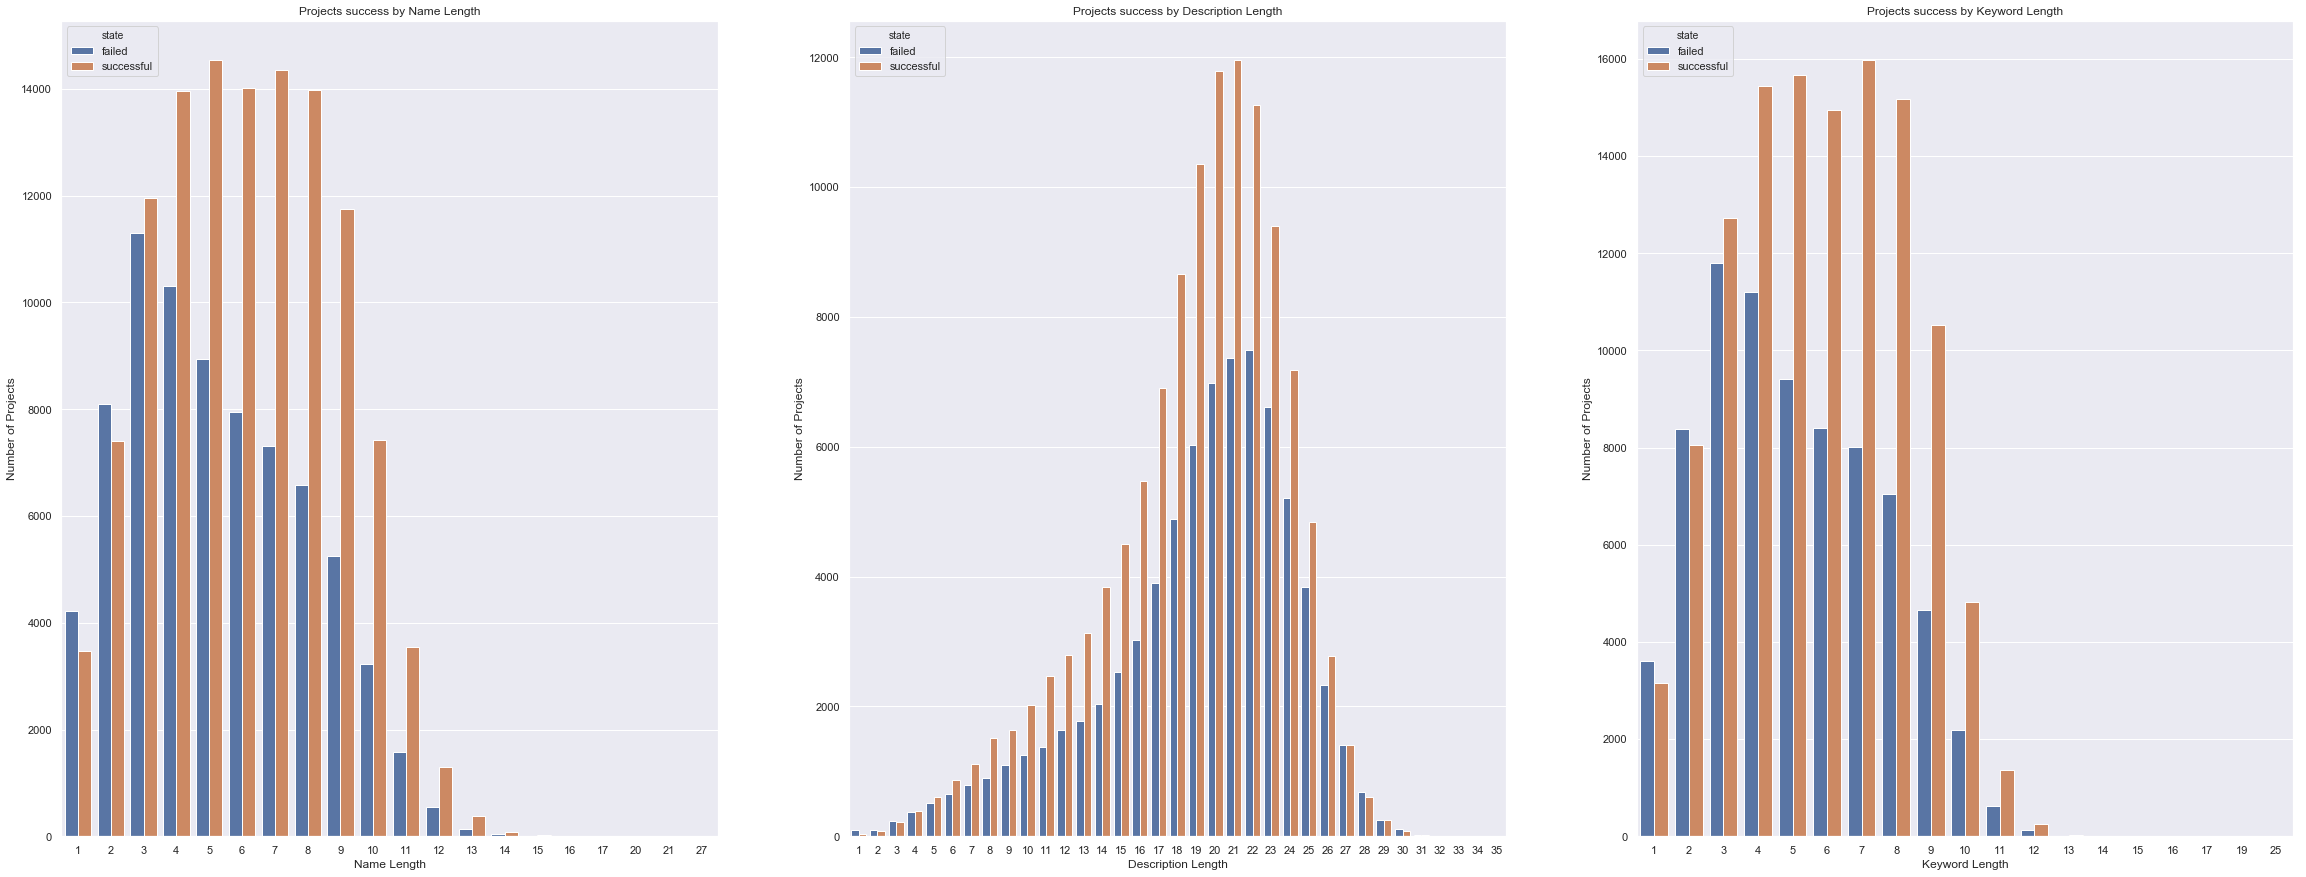

In [64]:
#Length of name, description and keywords
plt.figure(figsize = (40,15))
plt.subplot(1,3,1)
ay = sns.countplot(x="name_length", hue="state", data=ksdf)
plt.xlabel('Name Length')
plt.ylabel('Number of Projects')
plt.title('Projects success by Name Length')

plt.subplot(1,3,2)
ay = sns.countplot(x="description_length", hue="state", data=ksdf)
plt.xlabel('Description Length')
plt.ylabel('Number of Projects')
plt.title('Projects success by Description Length')

plt.subplot(1,3,3)
ay = sns.countplot(x="keyword_length", hue="state", data=ksdf)
plt.xlabel('Keyword Length')
plt.ylabel('Number of Projects')
plt.title('Projects success by Keyword Length')

Ideal length of a project name is in parallel with the number of keywords. Ideal description length of a project shoudl be twice the project mame. 

### Punctuation

In [65]:
#Name
SnameQM = successfulProject['name_contains_question_mark'].sum()
SnameEM = successfulProject['name_contains_exclamation_mark'].sum()
SnameDA = successfulProject['name_contains_dash'].sum()
SnameCO = successfulProject['name_contains_colon'].sum()
UnameQM = unsuccessfulProject['name_contains_question_mark'].sum()
UnameEM = unsuccessfulProject['name_contains_exclamation_mark'].sum()
UnameDA = unsuccessfulProject['name_contains_dash'].sum()
UnameCO = unsuccessfulProject['name_contains_colon'].sum()
#Description
SdescQM = successfulProject['description_contains_question_mark'].sum()
SdescEM = successfulProject['description_contains_exclamation_mark'].sum()
SdescDA = successfulProject['description_contains_dash'].sum()
SdescCO = successfulProject['description_contains_colon'].sum()
UdescQM = unsuccessfulProject['description_contains_question_mark'].sum()
UdescEM = unsuccessfulProject['description_contains_exclamation_mark'].sum()
UdescDA = unsuccessfulProject['description_contains_dash'].sum()
UdescCO = unsuccessfulProject['description_contains_colon'].sum()

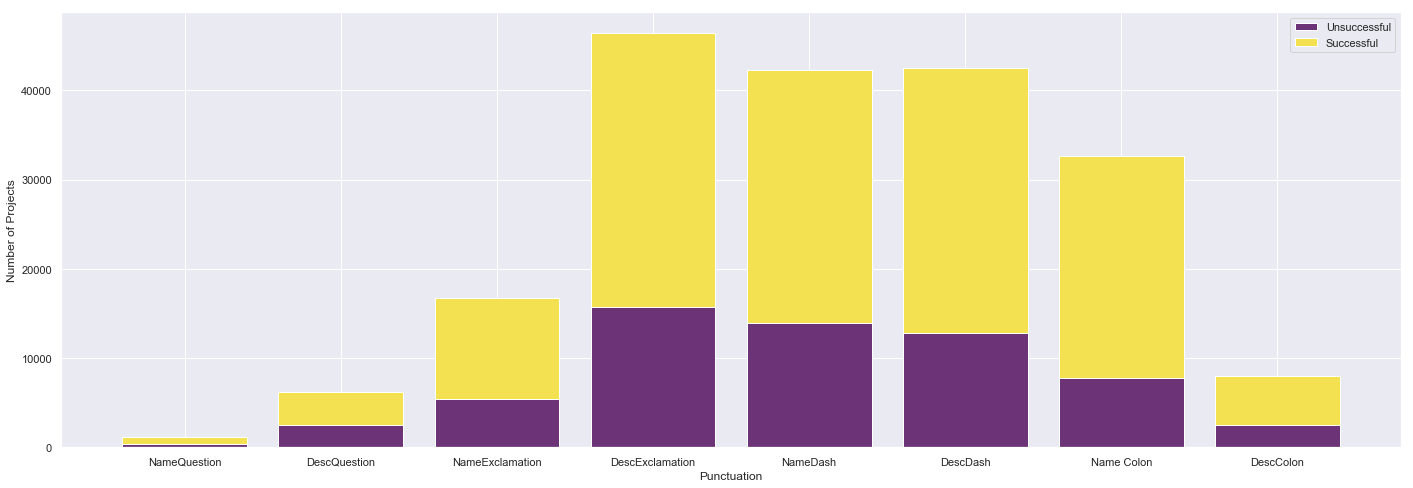

In [66]:
#Stacked graph with punctuation
punctuation = ['NameQuestion', 'DescQuestion', 'NameExclamation', 'DescExclamation', 'NameDash', 'DescDash', 'Name Colon', 'DescColon']
successfulPunc = [SnameQM, SdescQM, SnameEM, SdescEM, SnameDA, SdescDA, SnameCO, SdescCO]
unsuccessfulPunc = [UnameQM, UdescQM, UnameEM, UdescEM, UnameDA, UdescDA, UnameCO, UdescCO]

plt.figure(figsize = (24,8))
ax = plt.bar(punctuation, unsuccessfulPunc,  color="#6c3376" )
ay = plt.bar(punctuation, successfulPunc, bottom=unsuccessfulPunc, color="#f3e151")
plt.legend([ax, ay], ['Unsuccessful', 'Successful'])
plt.xlabel('Punctuation')  
plt.ylabel('Number of Projects')

plt.show() 

Project name or description should be of statement rather than question to attract the backers.

High amounts of project contain exclamation mark in the project description with a high success rate. This possibly indicates that it is important to express excitement while describing the project to gain potential backers admiration.

Dash is the only punctuation mark which is popular with the name and description. This clearly shows it is important to seprate group words when describing the project. 

Colon is very popular with the naming of successful projects. This possbily indicates the separation of name followed by a slogan?

## When is the ideal time to launch a project?

Text(0.5,1,'Project launched per day')

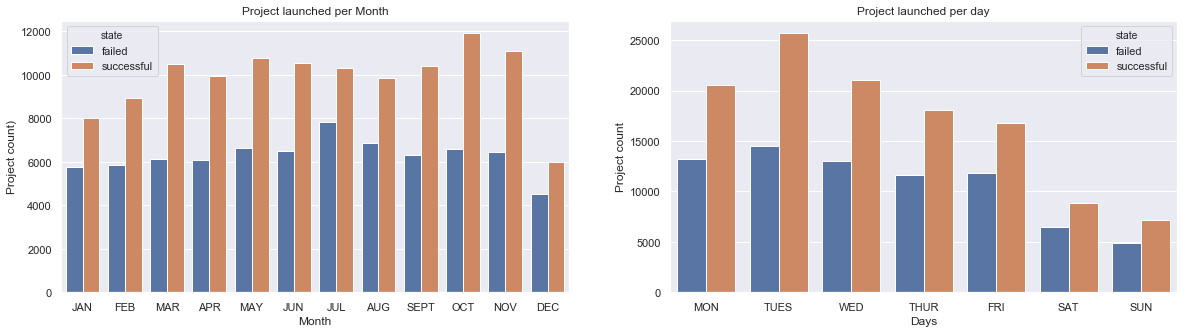

In [67]:
#display state by month and days
x = np.arange(12)
y = np.arange(7)
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='month_launched',hue="state", data =ksdf)
plt.xticks(x,('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC'))
plt.xlabel('Month')
plt.ylabel('Project count)')
plt.title('Project launched per Month')

plt.subplot(1,2,2)
sns.countplot(x='day_launched',hue="state", data =ksdf)
plt.xticks(y,('MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN'))
plt.xlabel('Days')
plt.ylabel('Project count')
plt.title('Project launched per day')

Here we can see that ideal month to launch a project is March, May, June, October and November. 

We can also see that ideal day to launch project is Tuesday followed by Wednesday and Monday. Avoid weekends.

Text(0.5,1,'USD pledge by backers per Day')

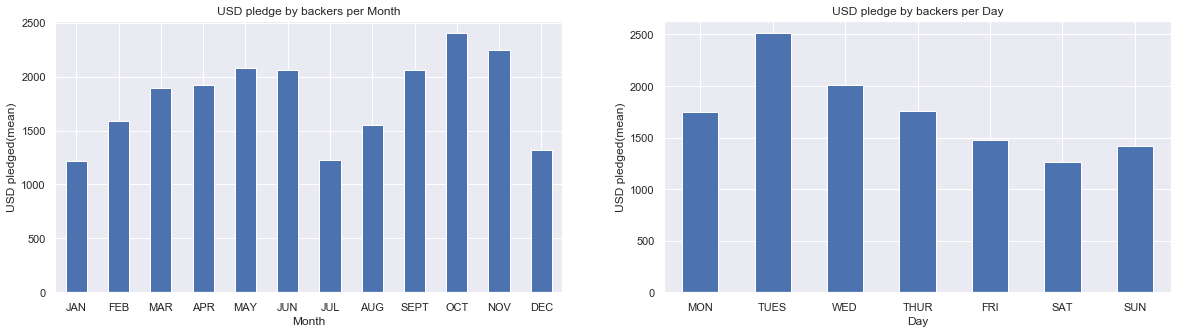

In [68]:
#usd pledged by month and day
x = np.arange(12)
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
ksdf.groupby('month_launched').usd_pledged.median().plot(kind='bar', rot=0)
plt.xticks(x,('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC'))
plt.xlabel('Month')
plt.ylabel('USD pledged(mean)')
plt.title('USD pledge by backers per Month')

y = np.arange(7)
plt.subplot(1,2,2)
ksdf.groupby('day_launched').usd_pledged.median().plot(kind='bar', rot=0)
plt.xticks(y,('MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN'))
plt.xlabel('Day')
plt.ylabel('USD pledged(mean)')
plt.title('USD pledge by backers per Day')

As we know there is a strong positve correlation between USD pledged and backers count, here are only analysing USD pledged by month and day as we know backers count will be of similar pattern.

October and Novembers are when most USD is pledged.Tuesday is the ideal to attract backers.

Text(0,0.5,'Amount pledged')

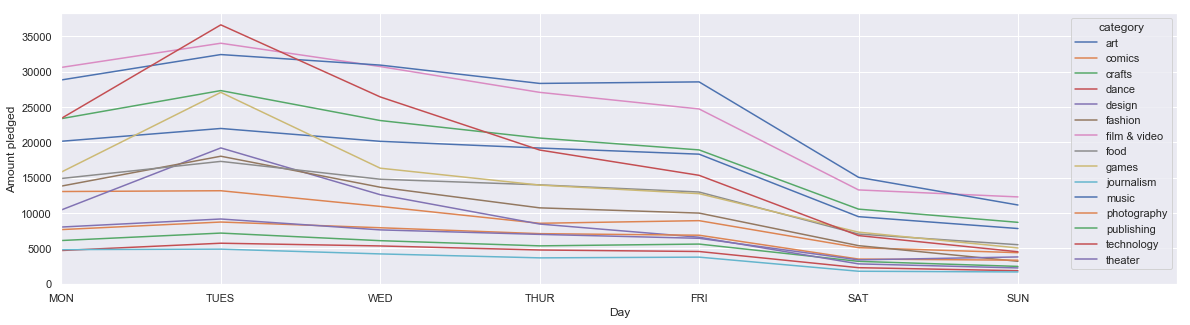

In [69]:
#usd pledged by day per category
y = np.arange(8)
fig, ax = plt.subplots(figsize=(20,5))
ksdf.groupby(['day_launched','category']).sum()['usd_pledged_log'].unstack().plot(ax=ax)
plt.xticks(y,('MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN',''))
ax.set_xlabel('Day')
ax.set_ylabel('Amount pledged')

Confirms the above findings apply for all categories.

Text(0,0.5,'Amount pledged')

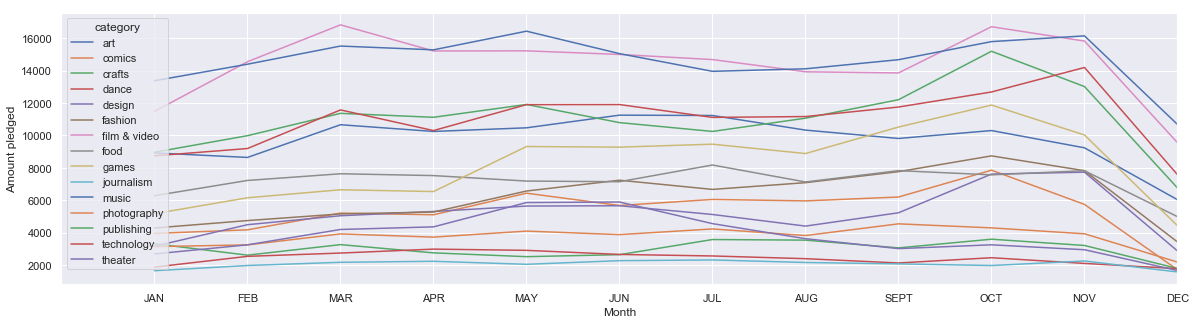

In [70]:
#usd pledged by month per category
x = np.arange(13)
fig, ax = plt.subplots(figsize=(20,5))
ksdf.groupby(['month_launched','category']).sum()['usd_pledged_log'].unstack().plot(ax=ax)
plt.xticks(x,(' ','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC'))
ax.set_xlabel('Month')
ax.set_ylabel('Amount pledged')

Further confirms the earlier fidning.

## What is the ideal project duration of a successful project?

Text(0.5,1,'Project launch duration')

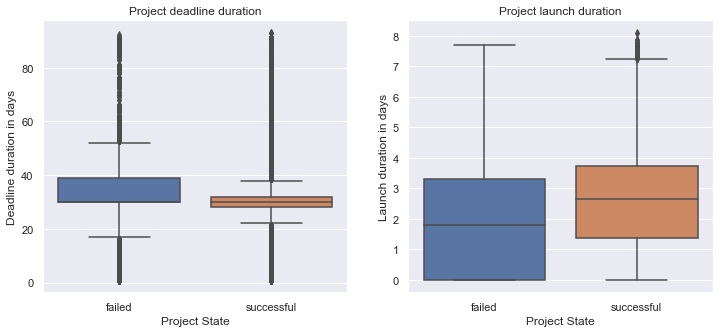

In [71]:
#Compare duration of projects 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(x ='state', y = 'deadline_duration', data = ksdf)
plt.xlabel('Project State')
plt.ylabel('Deadline duration in days')
plt.title('Project deadline duration')

#Compare duration taken for projects to go live
launchdays = ksdf['launch_duration'].apply(np.log)
plt.subplot(1,2,2)
sns.boxplot(x ='state', y = launchdays, data = ksdf)
plt.xlabel('Project State')
plt.ylabel('Launch duration in days')
plt.title('Project launch duration')

In [72]:
print(f"Mean deadline duration of successful projects is {int(round(ksdf.loc[ksdf['state'] == 'successful'].deadline_duration.mean(),0))} days.")
print(f"Mean launch duration of successful projects is {int(round(ksdf.loc[ksdf['state'] == 'successful'].launch_duration.mean(),0))} days.")

Mean deadline duration of successful projects is 31 days.
Mean launch duration of successful projects is 51 days.


We can see that successful projects have shorter deadline duration but take longer to launch for funding.

In [73]:
groupByCategoryMean = successfulProject.groupby(['category']).mean()

In [74]:
#use group by values to plot in scatter plot
launchdurationList = list(groupByCategoryMean.launch_duration)
deadlinedurationList = list(groupByCategoryMean.deadline_duration)
categorylsit = list(ksdf.category.unique())
df = pd.DataFrame(list(zip(categorylsit, launchdurationList, deadlinedurationList)), 
               columns =['category', 'launch_duration', 'deadline_duration'])

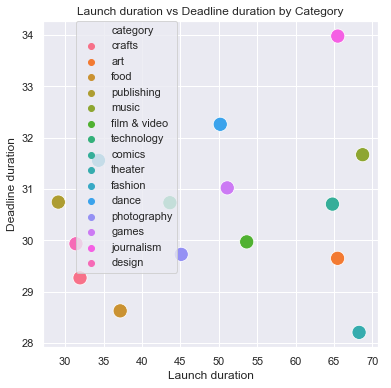

In [75]:
plt.figure(num=1, figsize=(6, 6))
ax = sns.scatterplot(x="launch_duration", y="deadline_duration", hue="category", data=df, s=200)
plt.title("Launch duration vs Deadline duration by Category")
plt.xlabel("Launch duration")
plt.ylabel("Deadline duration")
plt.legend(bbox_to_anchor=(0.4, 1), loc=1, borderaxespad=0.)
plt.savefig('books_read.png')

Dealine duration may vary per category.

## What is the ideal goal amount of a successful project?

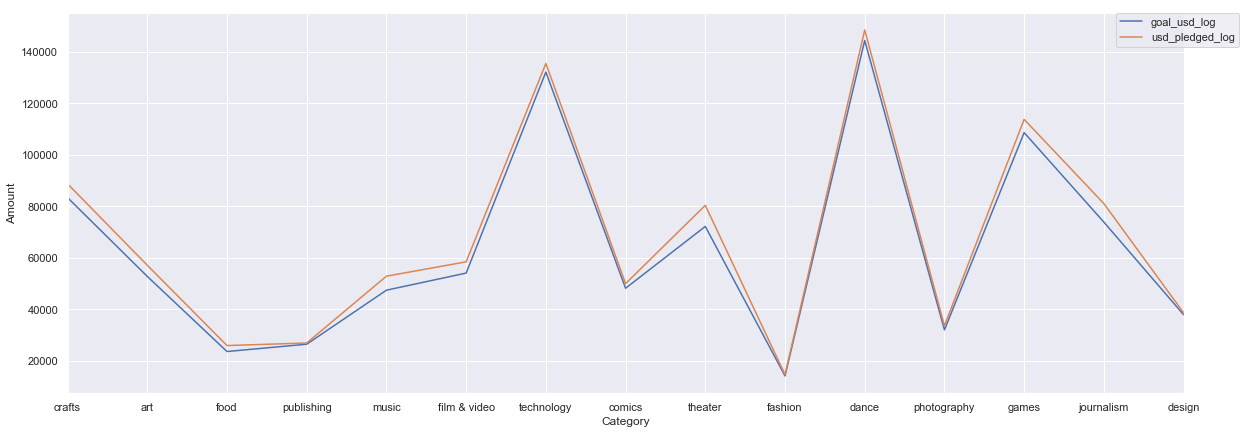

In [76]:
y = np.arange(15)
fig, ax = plt.subplots(figsize=(20,7))
successfulProject.groupby(['category']).goal_usd_log.sum().plot(ax=ax)
successfulProject.groupby(['category']).usd_pledged_log.sum().plot(ax=ax)
plt.xticks(y,('crafts', 'art', 'food', 'publishing', 'music', 'film & video',
       'technology', 'comics', 'theater', 'fashion', 'dance',
       'photography', 'games', 'journalism', 'design'))
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

Here we can see that successfull projects raise more than the goal amount. Especially the following categories: "music", "theater" and "journalism.

Text(0,0.5,'USD pledged')

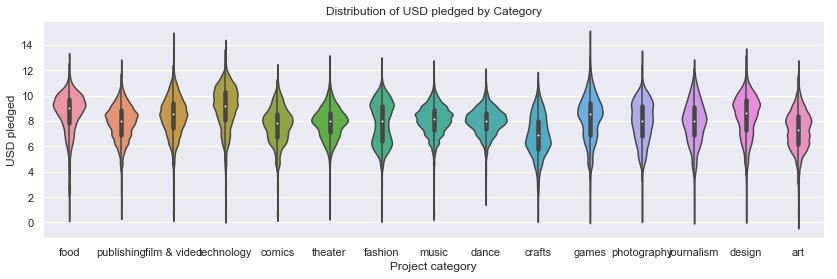

In [77]:
#USD pledged by category
plt.figure(num=1, figsize=(14, 4))
ax = sns.violinplot(x='category', y='goal_usd_log', data=successfulProject)
plt.title('Distribution of USD pledged by Category')
plt.xlabel('Project category')
plt.ylabel('USD pledged')

Here we can see that there is a difference of distributions of USD pledged by Category. The median points are on different levels suggesting that some categories can aim higher. 

In [78]:
#use group by values to plot in scatter plot
goalList = list(groupByCategoryMean.goal_usd)
categorylsit = list(ksdf.category.unique())
df = pd.DataFrame(list(zip(categorylsit, goalList)), 
               columns =['category', 'goal_usd'])

No handles with labels found to put in legend.


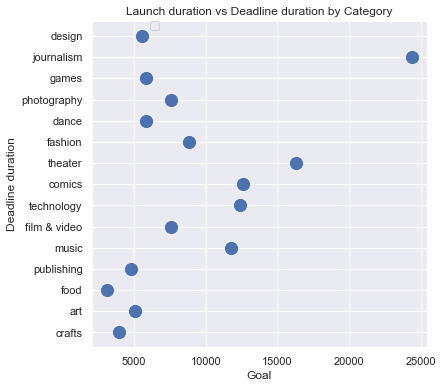

In [79]:
plt.figure(num=1, figsize=(6, 6))
ax = sns.scatterplot(x="goal_usd", y="category", data=df, s=200)
plt.title("Launch duration vs Deadline duration by Category")
plt.xlabel("Goal")
plt.ylabel("Deadline duration")
plt.legend(bbox_to_anchor=(0.2, 1), loc=1, borderaxespad=0.)

Journalism projects can have higher goals.

## Outliers 

As we saw during the analysis process this data do have a lot of outliers. Will use Mahalanobis distance to score each data point and set a threshold of 8 on that score to filter out outliers.

In [80]:
# Mahalanobis distance
ksdfCols = ['goal_usd', 'name_length','description_length', 'keyword_length', 'deadline_duration', 'launch_duration']
meanVariance = successfulProject[ksdfCols].mean().values.reshape(1, len(ksdfCols))
outlierValue = cdist(successfulProject[ksdfCols], meanVariance, metric='mahalanobis').flatten()
#[9]#

In [81]:
# Dropping outliers
cleanData = successfulProject.loc[outlierValue<=5, :]
cleanData.reset_index(drop=True, inplace=True)

In [82]:
print('The cleaned Channels dataset has a shape of :', cleanData.shape)

The cleaned Channels dataset has a shape of : (115309, 31)


## Linear Regression

Predict pledged amount to identify whats the ideal goal to set.

In [83]:
column1 = cleanData['goal_usd_log']
column2 = cleanData['usd_pledged_log']

In [84]:
# We first use the linear regression from scipy library which turns 4 values. We save all the results in variables
slope, intercept, r_value, p_value, std_err = stats.linregress(column1, column2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

Slope:  0.8863295924231611
Intercept:  1.3748018012914187
p_value:  0.0
std_err:  0.0013098602999114842


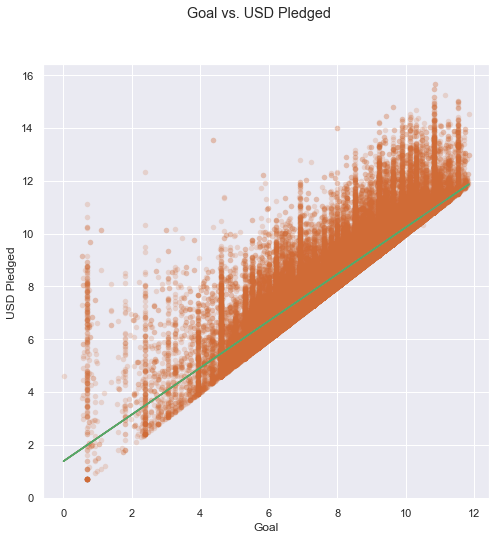

In [85]:
x1=column1.min() #min value of the independent variable
x2=column1.max() #max value of the independent variable
y1=x1*slope + intercept #calculate the dependent variable value from x1
y2=x2*slope + intercept #calculate the dependent variable value from x2

#Method 2: Calculate every y (dependent variable value) from every x
#(independent variable value, directly from the parameters
modelledDependentMethod2  = column1*slope + intercept

#(this was the suggested method in the practical, but is unnecessary,
#because it's linear, so you only need 2 points)
modelledDependentMethod3  = np.polyval([slope, intercept], column1)
plt.figure(figsize=(8,8))
#Plot a scatterplot as before
plt.suptitle('Goal vs. USD Pledged')
plt.xlabel('Goal')
plt.ylabel('USD Pledged')
plt.scatter(column1,column2 , c = "#D06B36", s = 30, alpha = 0.2, linewidth='0')
#overlay the modelled line (all three will be on top of each other)
#Method 1:
plt.plot([x1,x2],[y1,y2])
#Method 2:
plt.plot(column1, modelledDependentMethod2)
#Method 3:
plt.plot(column1, modelledDependentMethod3)

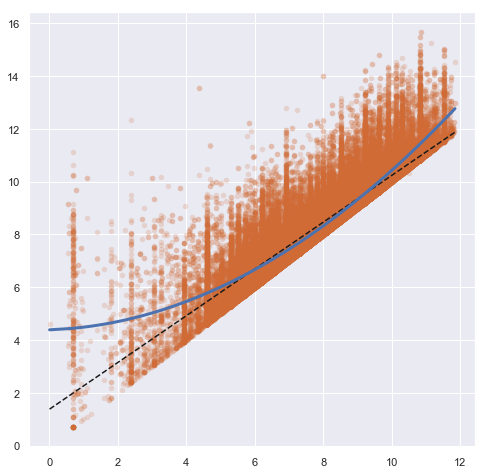

In [86]:
#Fit a second-order curve
pCoeff = np.polyfit(column1, column2, 2)
#Sort them, so the curve looks like a curve when drawn
xs = np.sort(column1)
#Calculate value for each of these using the polynomial
ys = np.polyval(pCoeff, xs)
plt.figure(figsize=(8,8))
#plot the data values
plt.scatter(column1,column2 , c = "#D06B36", s = 30, alpha = 0.2, linewidth='0')
#plot the linear "curve" - make is dashed
plt.plot([x1,x2],[y1,y2], "k--")
#plot the second order polynomal curve
plt.plot(xs, ys, linewidth = 3, fillstyle="none")

## Getting the data ready

In [87]:
#get dummies for category
df_kick = pd.get_dummies(ksdf, columns=['category'],\
                         prefix=['category'], drop_first=True)

In [88]:
#The following collums will be dropped as it is not required for our modelling
dropCol = ['country','created_at', 'launched_at', 'deadline','state_changed_at', 'usd_pledged', 'backers_count', 'sub_category','usd_pledged_log', 'goal_usd_log', 'backers_count_log']
df_kick.drop(labels=dropCol, axis='columns', inplace=True)

In [89]:
#Getting a new column with value set at 1 if project sucess and 0 if failed 
status=[]
for i in range(len(df_kick['state'])):
    if df_kick['state'].iloc[i] == 'successful':
        status.append((1))
    else:
        status.append((0))
             
df_kick['state']= status

In [90]:
#replace all boolean columns with 1 if true and 0 if false
def replace_boolean(df_kick):
    for col in df_kick:
        df_kick[col].replace(True, 1, inplace=True)
        df_kick[col].replace(False, 0, inplace=True)

replace_boolean(df_kick)

### MinMax Scaler

In [91]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_kick[['goal_usd', 'state', 'staff_pick', 'name_length','name_contains_question_mark', 'name_contains_exclamation_mark','name_contains_dash', 'name_contains_colon', 'description_length','description_contains_question_mark',
       'description_contains_exclamation_mark', 'description_contains_dash','description_contains_colon', 'keyword_length', 'sub_categorised','deadline_duration', 'launch_duration','month_launched', 'day_launched', 'category_comics', 'category_crafts',
       'category_dance', 'category_design', 'category_fashion','category_film & video', 'category_food', 'category_games','category_journalism', 'category_music', 'category_photography','category_publishing', 'category_technology', 'category_theater']])
col_names= ['goal_usd', 'state', 'staff_pick', 'name_length','name_contains_question_mark', 'name_contains_exclamation_mark','name_contains_dash', 'name_contains_colon', 'description_length','description_contains_question_mark','description_contains_exclamation_mark', 'description_contains_dash',
       'description_contains_colon', 'keyword_length', 'sub_categorised','deadline_duration', 'launch_duration','month_launched', 'day_launched', 'category_comics', 'category_crafts','category_dance', 'category_design', 'category_fashion',
       'category_film & video', 'category_food', 'category_games','category_journalism', 'category_music', 'category_photography','category_publishing', 'category_technology', 'category_theater']
df_mm = pd.DataFrame(df_mm, columns=col_names)

## Correlation Analysis 

In [92]:
#We will do pearosn correlation
corr = df_mm.corr(method='pearson')

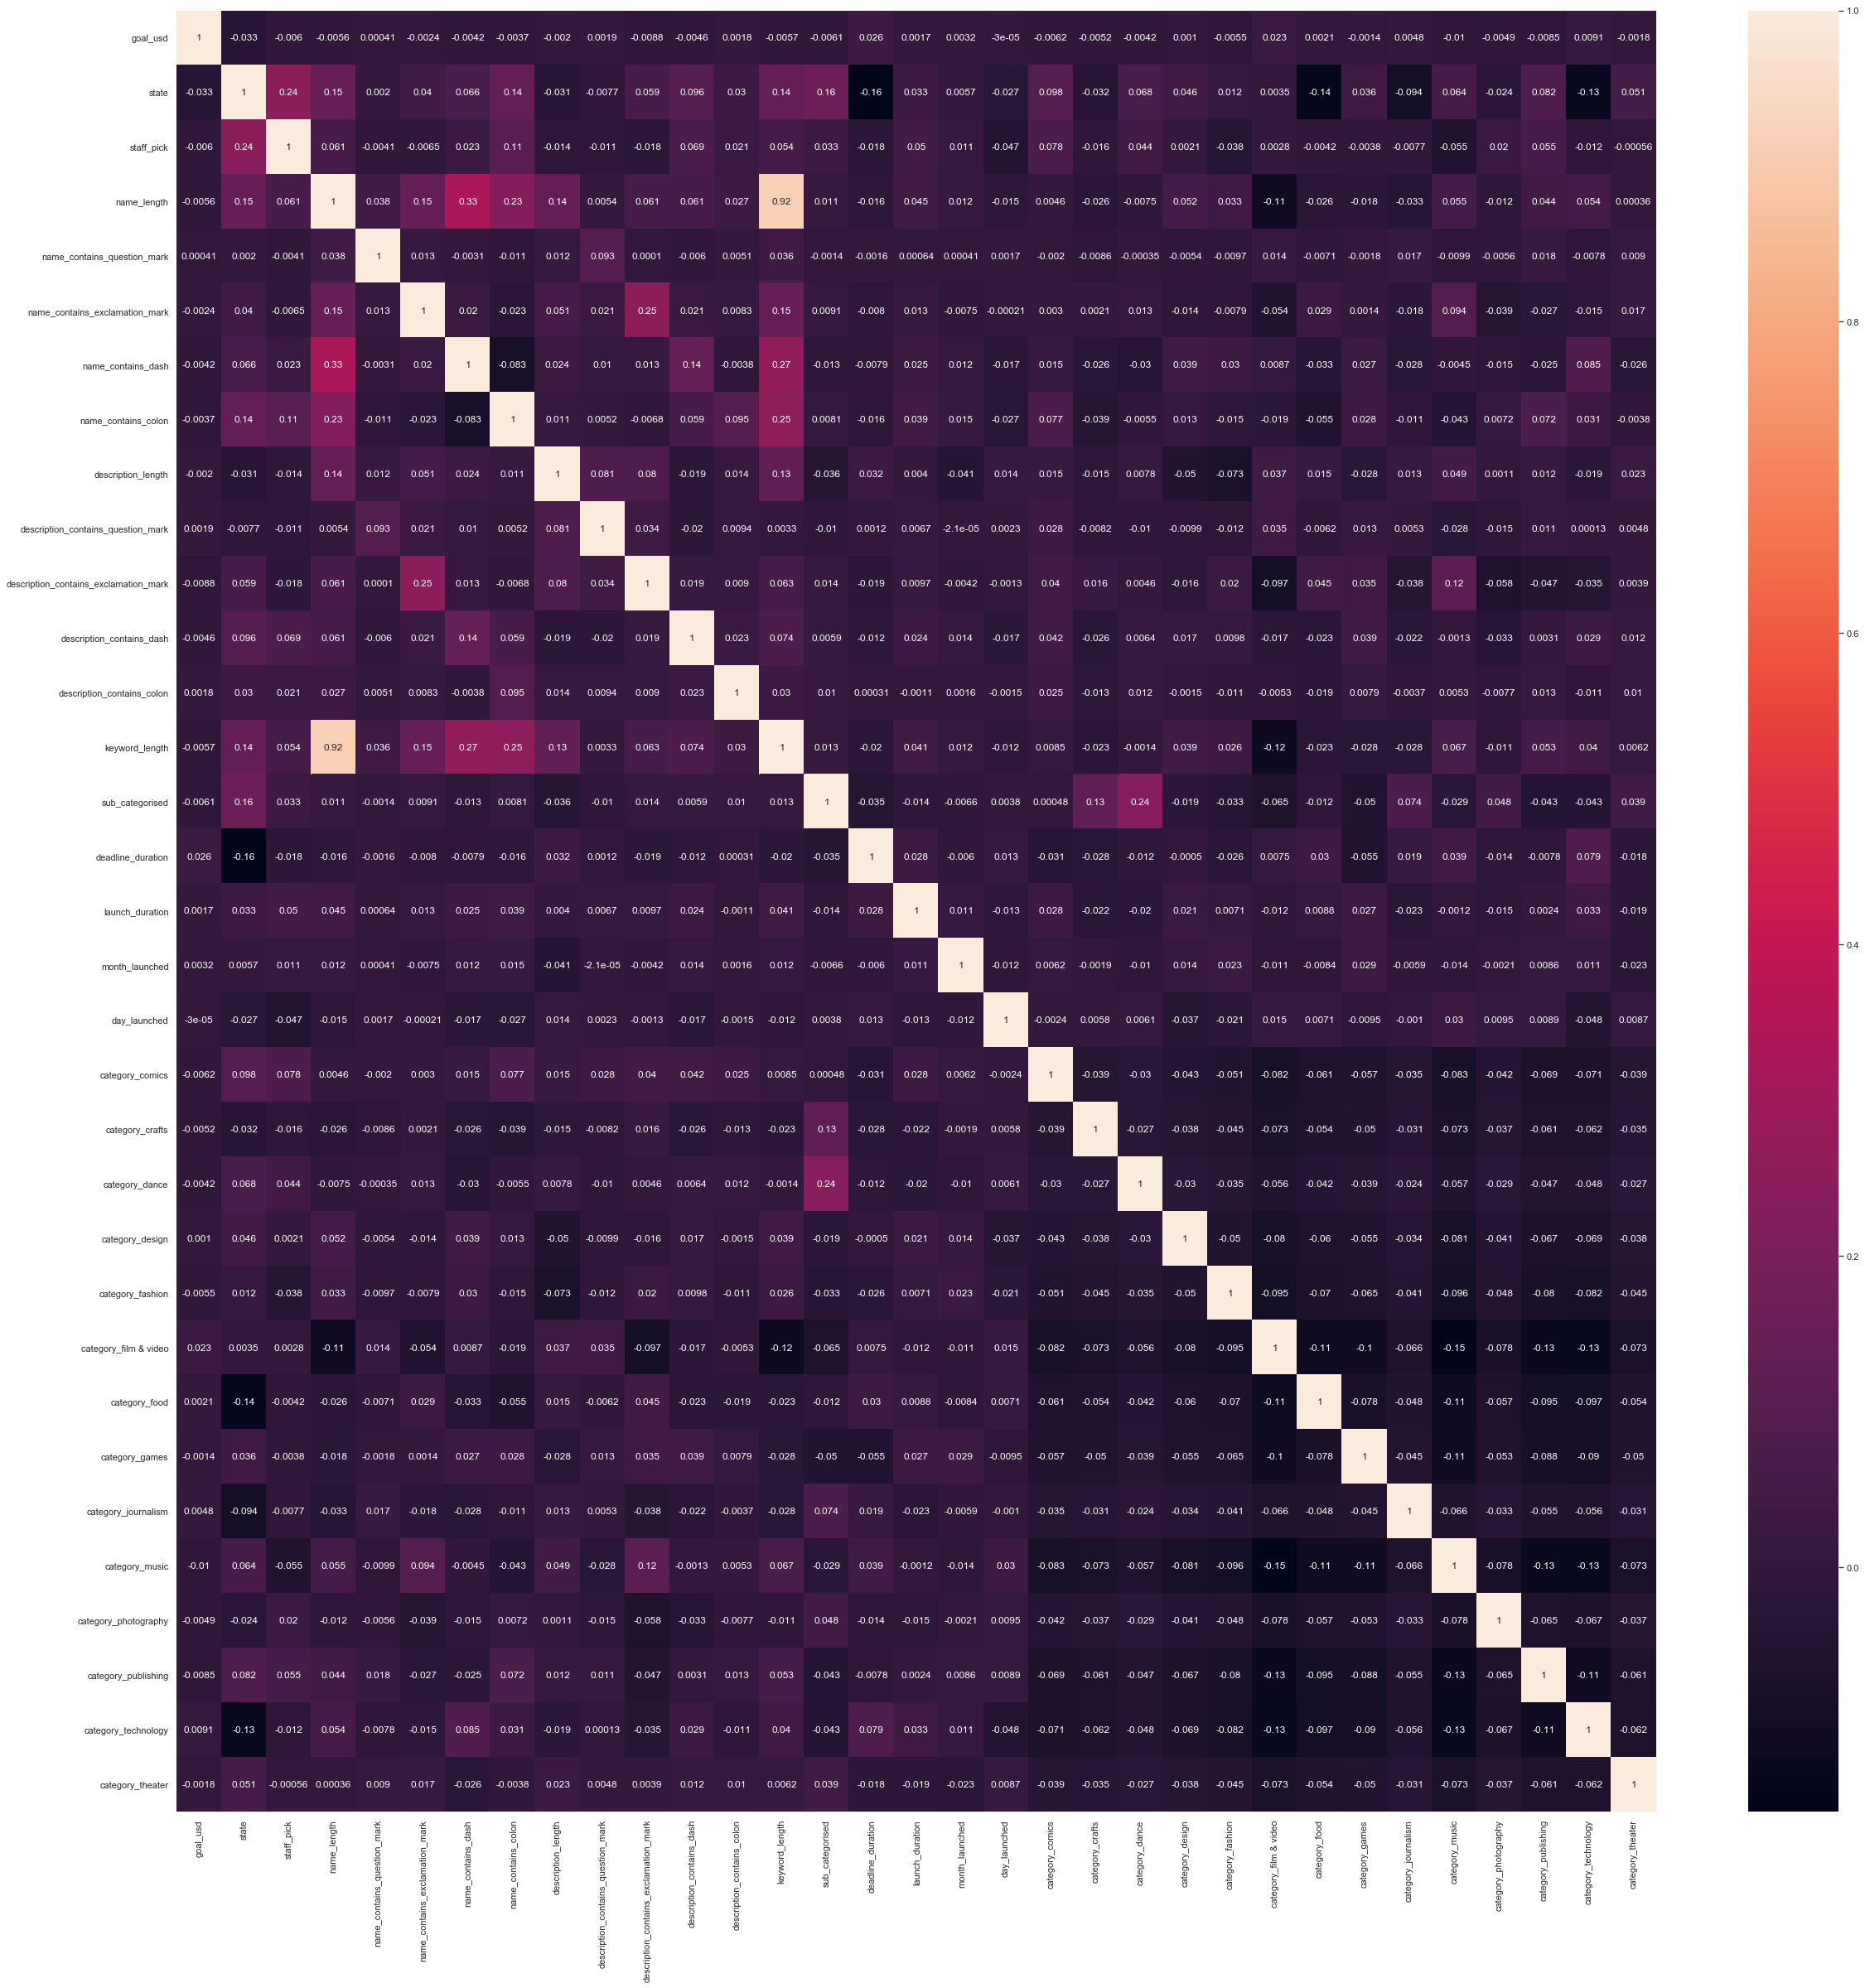

In [93]:
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot = True)
plt.show()

In [94]:
#drop keyword length as it is highly correlated with name length
dropCol = ['keyword_length']
df_kick.drop(labels=dropCol, axis='columns', inplace=True)

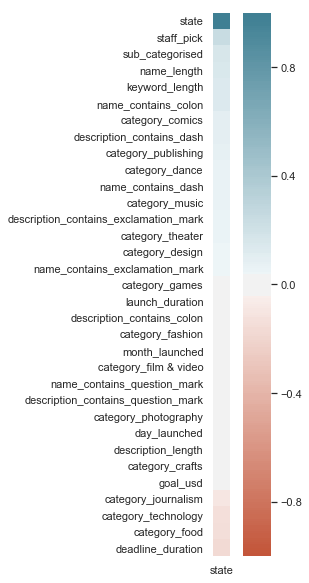

In [95]:
#idenify correlation by project state
corr_state =corr[['state']]

#sort by the amount of correlation
corr_state=corr_state.sort_values(by ='state',ascending=False)

plt.figure(figsize = (5,10))
import seaborn as sns
ax = sns.heatmap(
    corr_state, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Staff Pick and non Sub Categorised projects significant to projects success along with name length and keyword length.

# Random forest

In [96]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(df_mm.drop(['state'], axis='columns'), df_mm.state, test_size = 0.2)

In [97]:
#Random Forest Classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
#model score
model.score(X_test, y_test)

0.7765413611484044

In [99]:
y_predicted = model.predict(X_test)

Text(21.5,0.5,'truth')

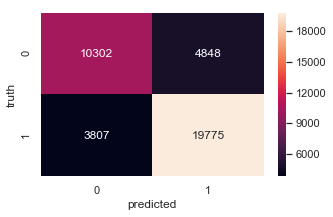

In [100]:
#show confusion matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('truth')

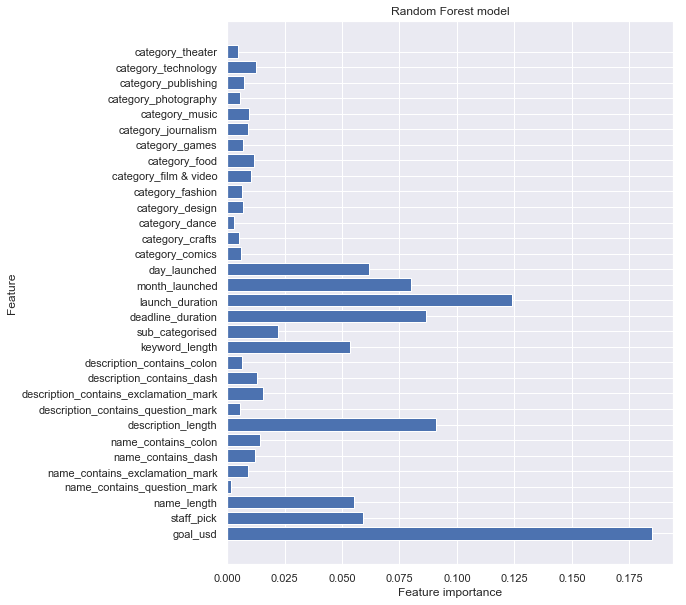

In [101]:
# Plotting feature importance
featuresImportance = X_train.shape[1]
plt.figure(figsize=(8,10))
plt.barh(range(featuresImportance), model.feature_importances_, align='center') 
plt.yticks(np.arange(featuresImportance), X_train.columns.values) 
plt.title("Random Forest model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Feature we engineered weren't significance in predicting the outcome of a project accodring to the model.

## XgBoost

In [102]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(df_mm.drop(['state'], axis='columns'), df_mm.state, test_size = 0.2)

In [103]:
#[8]#
xgb = XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=100, n_estimators=100, subsample=0.7)
xgb.fit(X_train, y_train)

xgb_y_hat_train2 = xgb.predict(X_train)
xgb_y_hat_test2 = xgb.predict(X_test)

print("XGBoost score for training set:", round(xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(xgb.score(X_test, y_test),5))

XGBoost score for training set: 0.78717
XGBoost score for test set: 0.76988


In [104]:
y_predicted = model.predict(X_test)

Text(21.5,0.5,'truth')

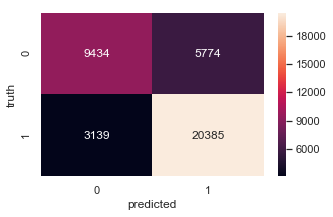

In [105]:
#show confusion matrix
cm = confusion_matrix(y_test, xgb_y_hat_test2)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('truth')

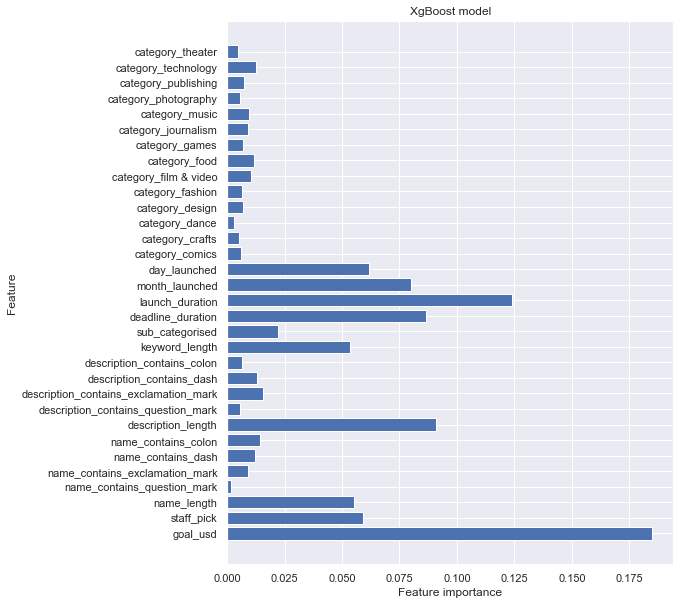

In [106]:
# Plotting feature importance
featuresImportance = X_train.shape[1]
plt.figure(figsize=(8,10))
plt.barh(range(featuresImportance), model.feature_importances_, align='center') 
plt.yticks(np.arange(featuresImportance), X_train.columns.values) 
plt.title("XgBoost model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Feature we engineered was significance in predicting the outcome of a project accodring to the model which was also more accurate.

# Refrences


[1] Statista. (2019). Kickstarter: Statistics & Facts. [online] <br>
Available at: https://www.statista.com/topics/2102/kickstarter/ [Accesssed 25 Oct. 2019]
<br>
<br>
[2] Web Robots. (2019). Kickstarter Projects Dataset. [online] <br>
Available at: https://webrobots.io/kickstarter-datasets/ [Accesssed 24 Oct. 2019]
<br>
<br>
[3] Kickstarter. (2019). Stats. [online] <br>
Available at: https://www.kickstarter.com/help/stats?ref=global-footer [Accesssed 25 Oct. 2019]
<br>
<br>
[4] Towards Data Science. (2019). using machine learning to predict kickstarter success . [online] <br>
Available at: https://towardsdatascience.com/using-machine-learning-to-predict-kickstarter-success-e371ab56a743 [Accesssed 01 Nov. 2019]
<br>
<br>
[5] Wikipedia. (2019). Kickstarter.
[online] <br> 
Available at: https://en.wikipedia.org/wiki/Kickstarter [Accesssed 01 Nov. 2019]
<br>
<br>
[6] Dani Web. (2019). Using pandas to concatenate multiple csv files.
[online] <br> 
Available at: https://www.daniweb.com/programming/software-development/threads/497685/using-pandas-to-merge-concatenate-multiple-csv-files-into-one-csv-file [Accesssed 01 Nov. 2019]
<br>
<br>
[7] Towards Data Science. (2019). How to use gg plot.
[online] <br> 
Available at: https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129 [Accesssed 10 Dec. 2019]
<br>
<br>
[8] Data Camp. (2019). XgBoost in Python.
[online] <br> 
Available at: https://www.datacamp.com/community/tutorials/xgboost-in-python [Accesssed 12 Dec. 2019]
<br>
<br>
[9] Stack Overflow (2014). Strip time from an Object date in pandas.
[online] <br> 
Available at: https://stackoverflow.com/questions/26387986/strip-time-from-an-object-date-in-pandas [Accesssed 12 Dec. 2019]
<br>
<br>
[10] Scikit Learn (2019). Plot mahalanobis distance.
[online] <br> 
Available at: https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html[Accesssed 13 Dec. 2019]
<br>
<br>